# Old

In [ ]:
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

# from experiments.visualization import *

In [10]:
# from tqdm import tqdm
# def main(
#     train_task_name: str,
#     eval_task_name: str,
#     num_eval_to_collect: int,
#     use_parallel: Optional[bool] = True,
#     hans_heuristic: Optional[str] = None,
#     trained_on_task_name: Optional[str] = None,
# ) -> List[Dict[int, float]]:

#     if train_task_name not in ["mnli-2", "hans"]:
#         raise ValueError

#     if eval_task_name not in ["mnli-2", "hans"]:
#         raise ValueError

#     if trained_on_task_name is None:
#         # The task the model was trained on
#         # can be different from `train_task_name`
#         # which is used to determine on which the
#         # influence values will be computed.
#         trained_on_task_name = train_task_name

#     if trained_on_task_name not in ["mnli-2", "hans"]:
#         raise ValueError

#     # `trained_on_task_name` determines the model to load
#     if trained_on_task_name in ["mnli-2"]:
#         tokenizer, model = misc_utils.create_tokenizer_and_model(
#             constants.MNLI2_MODEL_PATH)

#     if trained_on_task_name in ["hans"]:
#         tokenizer, model = misc_utils.create_tokenizer_and_model(
#             constants.HANS_MODEL_PATH)

#     train_dataset, _ = misc_utils.create_datasets(
#         task_name=train_task_name,
#         tokenizer=tokenizer)

#     _, eval_dataset = misc_utils.create_datasets(
#         task_name=eval_task_name,
#         tokenizer=tokenizer)

#     if trained_on_task_name == "mnli-2" and train_task_name == "mnli-2":
#         faiss_index = faiss_utils.FAISSIndex(768, "Flat")
#         faiss_index.load(constants.MNLI2_FAISS_INDEX_PATH)
#     elif trained_on_task_name == "hans" and train_task_name == "hans":
#         faiss_index = faiss_utils.FAISSIndex(768, "Flat")
#         faiss_index.load(constants.HANS_FAISS_INDEX_PATH)
#     elif trained_on_task_name == "mnli-2" and train_task_name == "hans":
#         faiss_index = faiss_utils.FAISSIndex(768, "Flat")
#         faiss_index.load(constants.MNLI2_HANS_FAISS_INDEX_PATH)
#     elif trained_on_task_name == "hans" and train_task_name == "mnli-2":
#         faiss_index = faiss_utils.FAISSIndex(768, "Flat")
#         faiss_index.load(constants.HANS_MNLI2_FAISS_INDEX_PATH)
#     else:
#         faiss_index = None

#     trainer = Trainer(
#         model=model,
#         args=TrainingArguments(
#             output_dir="./tmp-output",
#             per_device_train_batch_size=128,
#             per_device_eval_batch_size=128,
#             learning_rate=5e-5,
#             logging_steps=100),
#         train_dataset=train_dataset,
#         eval_dataset=eval_dataset,
#     )

#     if eval_task_name in ["mnli-2"]:
#         eval_instance_data_loader = misc_utils.get_dataloader(
#             dataset=eval_dataset,
#             batch_size=1,
#             random=False)

#     if eval_task_name in ["hans"]:
#         if hans_heuristic is None:
#             raise ValueError("`hans_heuristic` cannot be None for now")

#         hans_helper = HansHelper(
#             hans_train_dataset=None,
#             hans_eval_dataset=eval_dataset)

#         _, eval_instance_data_loader = hans_helper.get_dataset_and_dataloader_of_heuristic(
#             mode="eval",
#             heuristic=hans_heuristic,
#             batch_size=1,
#             random=False)

#     # Data-points where the model got wrong
#     wrong_input_collections = []
#     for i, test_inputs in enumerate(tqdm(eval_instance_data_loader)):
#         logits, labels, step_eval_loss = misc_utils.predict(
#             trainer=trainer,
#             model=model,
#             inputs=test_inputs)
#         if logits.argmax(axis=-1).item() != labels.item():
#             wrong_input_collections.append(test_inputs)
    
#     return wrong_input_collections

In [11]:
# o = main("hans", "hans", num_eval_to_collect=100, use_parallel=False, hans_heuristic="subsequence", trained_on_task_name="hans")

# New

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

from experiments.visualization import *

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [2]:
import torch
from experiments import hans

In [12]:
# output_collections = torch.load("./figures/another-hans-augentation-experimental.pth")
BASE_PATH = "/export/home/hguo/Experiments/20201118/"
output_collections = {
    "lexical_overlap": torch.load(
#         os.path.join(BASE_PATH, "hans-augmentation-new.hans.lexical_overlap.3.False.pth")),
        os.path.join(BASE_PATH, "hans-augmentation-new.mnli-2.lexical_overlap.3.False.pth")),
    "constituent": torch.load(
#         os.path.join(BASE_PATH, "hans-augmentation-new.hans.constituent.3.False.pth")),
        os.path.join(BASE_PATH, "hans-augmentation-new.mnli-2.constituent.3.False.pth")),
    "subsequence": torch.load(
#         os.path.join(BASE_PATH, "hans-augmentation-new.hans.subsequence.3.False.pth")),
        os.path.join(BASE_PATH, "hans-augmentation-new.mnli-2.subsequence.3.False.pth")),
}

In [13]:
display(output_collections.keys())
COMMON_KEY_SUFFIX = "1-0.0001-"
for output_collection in output_collections.values():
    for key in output_collection.keys():
        if not key.endswith(COMMON_KEY_SUFFIX):
            raise ValueError

dict_keys(['lexical_overlap', 'constituent', 'subsequence'])

In [14]:
print(output_collections["lexical_overlap"]["random-0-1-0.0001-"][0]["loss"])
print(output_collections["constituent"]["random-0-1-0.0001-"][0]["loss"])
print(output_collections["subsequence"]["random-0-1-0.0001-"][0]["loss"])

{'lexical_overlap': 1.6521450951695442, 'subsequence': 1.4429818533360959, 'constituent': 1.1716254234313965}
{'lexical_overlap': 1.6521450951695442, 'subsequence': 1.4429818533360959, 'constituent': 1.1716254234313965}
{'lexical_overlap': 1.6521450951695442, 'subsequence': 1.4429818533360959, 'constituent': 1.1716254234313965}


In [6]:
import numpy as np
import matplotlib.pyplot as plt


def plot_Xs_and_Ys_dict(
        axis: Subplot,
        Xs: List[float],
        Ys_dict: Dict[str, List[List[float]]],
        title: str,
        xlabel: str,
        ylabel: str,
        xscale_log: bool = True,
        yscale_log: bool = True,
        output_file_name: Optional[str] = None,
) -> None:

    color_map = {
        "helpful-lexical_overlap": "#015758",
        "helpful-subsequence": "#1B8C81",
        "helpful-constituent": "#A6BF80",
        "harmful-lexical_overlap": "#EC2F3B",
        "harmful-subsequence": "#F26249",
        "harmful-constituent": "#FF9B5A",
        "random": "lightgrey",
    }

    for tag in Ys_dict.keys():
        if tag not in color_map.keys():
            raise ValueError

        color = color_map[tag]
        data = np.array(Ys_dict[tag])
        is_random_data_point = "random" in tag
        # `data` should be [n, m]
        # where `n` is the number of independent trials
        # and `m` is the number of experiments within each trial
        if len(data.shape) != 2:
            raise ValueError(f"`data` should be an 2d array, {data.shape}")

        if data.shape[0] != 1:
            # i.e., it has multiple trials
            data_mean = data.mean(axis=0)
            data_max = data.max(axis=0)
            data_min = data.min(axis=0)
            # data_std = data.std(axis=0)
            axis.plot(
                Xs,
                data_mean,
                color=color,
                label=tag,
                linestyle=("--" if is_random_data_point else None))

            axis.fill_between(
                Xs,
                data_max,
                data_min,
                alpha=0.25,
                color=color)
        else:
            raise ValueError

    if xscale_log is True:
        axis.set_xscale("log")

    if yscale_log is True:
        axis.set_yscale("log")

    axis.set_xlabel(xlabel, fontsize=30)
    axis.set_ylabel(ylabel, fontsize=30)
    axis.set_title(title, fontsize=30)
#     axis.legend(fontsize=15)

    if output_file_name is not None:
        plt.savefig(output_file_name)

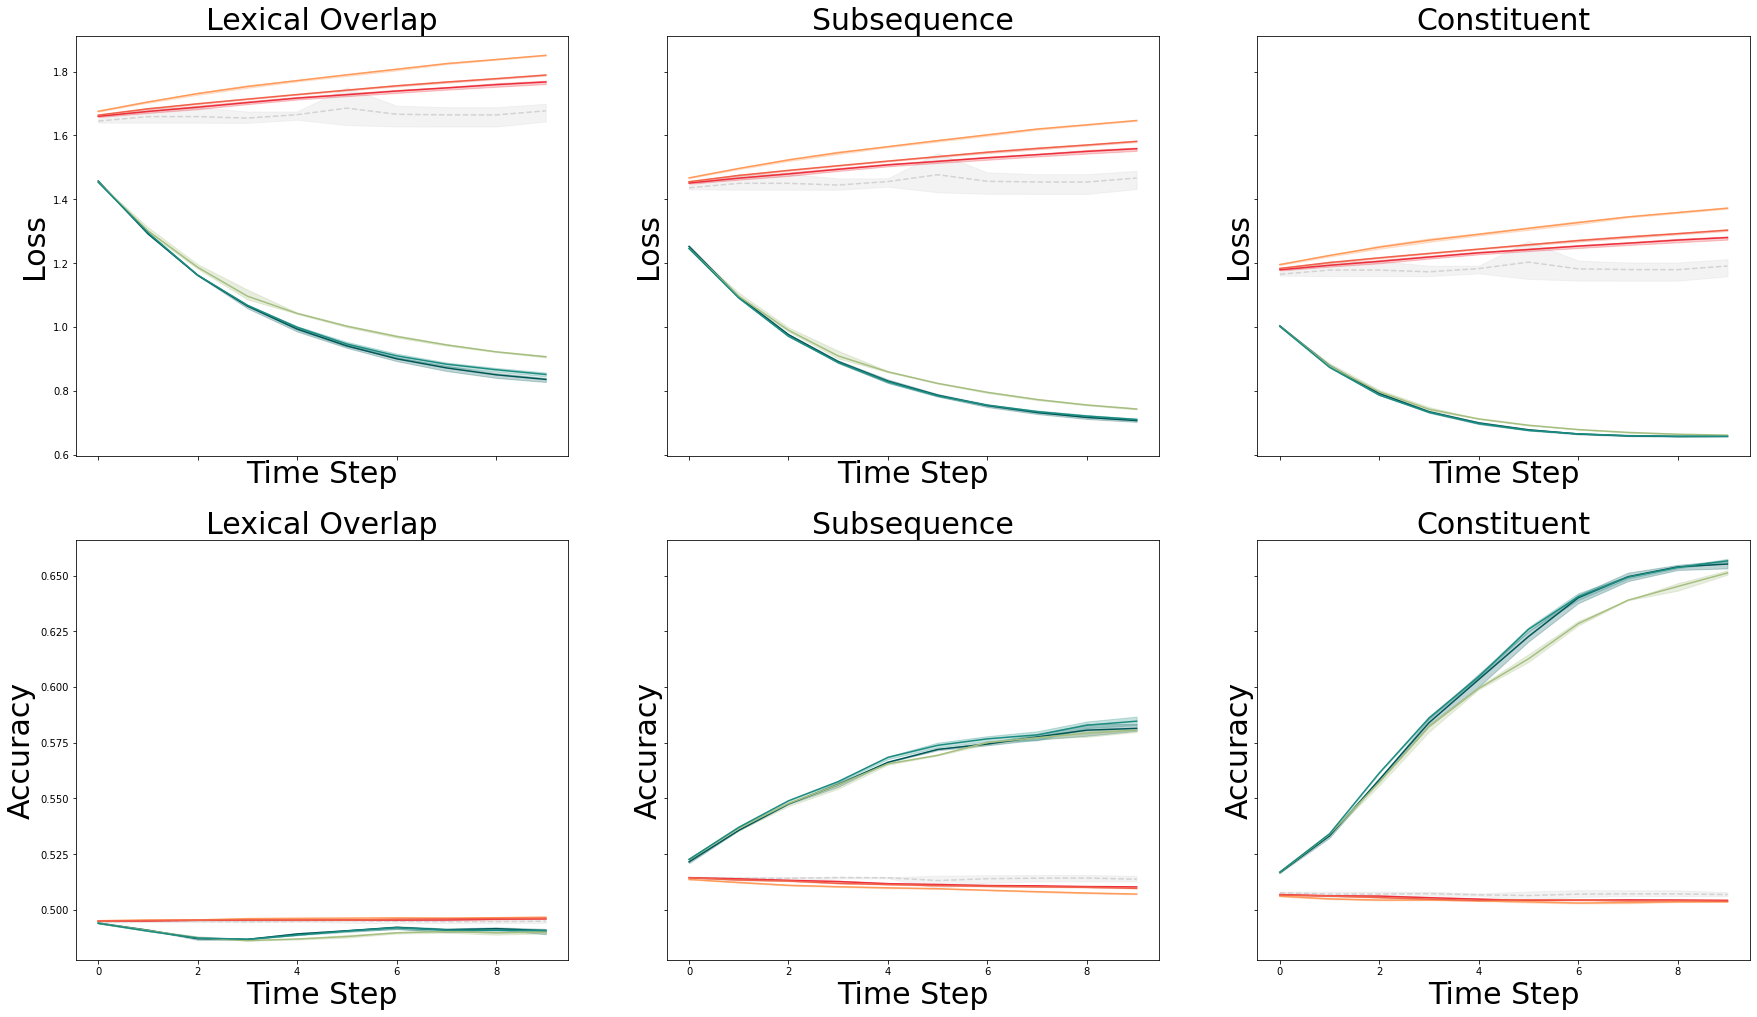

In [7]:
plt.rcParams["figure.figsize"] = (30, 17)


fig, axes = plt.subplots(2, 3, sharex=True, sharey="row")
for metric_index, metric_name in enumerate(["loss", "accuracy"]):
    for slice_index, slice_name in enumerate(hans.DEFAULT_EVAL_HEURISTICS):
        
        # The random numbers are the same,
        # so just pick one of them
        Ys_dict = {
            f"random": np.array([
                [output_collections
                 ["lexical_overlap"]
                 [f"random-{replication_index}-{COMMON_KEY_SUFFIX}"]
                 [step_index]
                 [metric_name]
                 [slice_name]
                 for step_index in range(10)
                ] for replication_index in range(3)
            ])
        }
        for collection_key, collection in output_collections.items():
            Ys_dict[f"helpful-{collection_key}"] = np.array([
                [collection
                 [f"most-helpful-{replication_index}-{COMMON_KEY_SUFFIX}"]
                 [step_index]
                 [metric_name]
                 [slice_name]
                 for step_index in range(10)
                ] for replication_index in range(3)
            ])
            
            Ys_dict[f"harmful-{collection_key}"] = np.array([
                [collection
                 [f"most-harmful-{replication_index}-{COMMON_KEY_SUFFIX}"]
                 [step_index]
                 [metric_name]
                 [slice_name]
                 for step_index in range(10)
                ] for replication_index in range(3)
            ])

        plot_Xs_and_Ys_dict(
            axis=axes[metric_index, slice_index],
            Xs=range(10),
            Ys_dict=Ys_dict,
            title=" ".join([m.capitalize() for m in slice_name.split("_")]),
            xlabel="Time Step",
            ylabel=metric_name.capitalize(),
            xscale_log=False,
            yscale_log=False)

In [8]:
fig.savefig("./20201118-hans-augmentation-using-mnli-2.pdf")